# Objective
### Main objective 
Out project focuses on developing a machine learning model that can classify music based on its genre. The model will be trained on a dataset of music tracks, each labeled with a genre. The model will be able to predict the genre of a music track based on its features.
### Sub-objective
Develop an interface that allows users to upload a music track and get the predicted genre.
Compare the performance of the different machine learning models with different deep learning models.
### Problem statement
Correctly classifying music by genre is not always straightforward. Different pieces of music share overlapping characteristics and can be subjectively assessed. Our project aims to extract relevant features from music to achieve an accurate genre classification.

For music lovers, researchers, and developers, such a model can be useful for faster categorization and analysis of music. While there is no specific target audience, this technology can be widely applied in music streaming, recommendation systems, and music archiving.

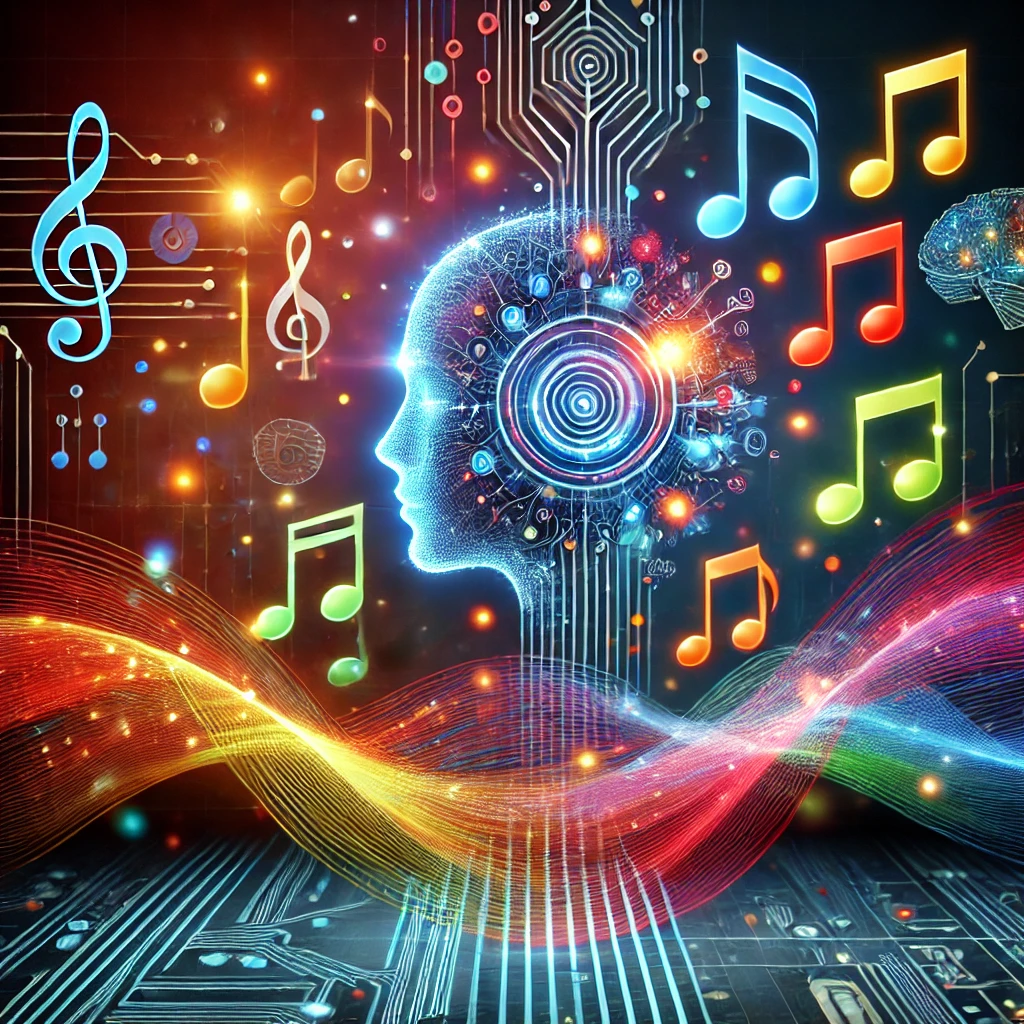

# Analysis
### Preliminary research
To establish a solid foundation for our project, we researched existing projects that classify music by genre. We found that music genre classification is a well-researched area in machine learning. Several studies have used audio features to classify music genres with high accuracy. We also found that the GTZAN dataset is a popular dataset for music genre classification. It contains 1000 audio tracks, each labeled with a genre.
Several projects we have found and based on them we will develop our project:
- [Work w/ Audio Data: Visualise, Classify, Recommend](https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend)
- [Music Genre Classification using Machine Learning](https://www.geeksforgeeks.org/music-genre-classifier-using-machine-learning/)
- [Let's tune🎧the music🎵🎶with CNN🎼XGBoost🎷🎸🎻🎺](https://www.kaggle.com/code/aishwarya2210/let-s-tune-the-music-with-cnn-xgboost)
- [Music Genre Classification: Training an AI model](https://arxiv.org/html/2405.15096v1)
- [Music Genre Classification](https://www.kaggle.com/code/jvedarutvija/music-genre-classification)
### Dataset
We used the GTZAN dataset for our project. The dataset contains 1000 audio tracks, each labeled with a genre. The genres in the dataset are blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock.
- [GTZAN dataset](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification)
#### Data description
- **genres_original:** A collection of 10 genres with 100 audio files each, all having a length of 30 seconds.
- **images_original:** A visual representation for each audio file. One way to classify data is through neural networks. Because NNs (like CNN, what we will be using today) usually take in some sort of image representation, the audio files were converted to Mel Spectrograms to make this possible.
- **features_30_sec:** Containing features of the audio files. For each song (30 seconds long), a mean and variance were computed over multiple features that can be extracted from an audio file.
- **features_3_sec:** Containing the same strutcture as the previous file, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models).

### Technologies
We will use the following technologies for our project:
- **Python:** We will use Python for data preprocessing, model training, and interface development.
- **Jupyter Notebook:** We will use Jupyter Notebook for data exploration, model development, and documentation.

### Libraries
We will use the following libraries for our project:
- **Pandas:** We will use Pandas for data manipulation and analysis.
- **NumPy:** We will use NumPy for numerical operations.
- **Matplotlib:** We will use Matplotlib for data visualization.
- **Seaborn:** We will use Seaborn for data visualization.
- **Librosa:** We will use Librosa for audio analysis.
- **Ipython:** We will use Ipython for interactive computing.
- **Scikit-learn:** We will use Scikit-learn for machine learning.
- **Streamlit:** We will use Streamlit for interface development.

In [ ]:
# Usual Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Libraries for audio visualization
import librosa.display
import IPython.display as ipd

# Libraries for normalization and dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler



### Data visualization
First, we want to gain a better understanding of the dataset. To achieve this, we will visualize the key features extracted from the audio files and compare them. Specifically, we will analyze the distribution of these features across different labels to identify patterns and differences. This will help us determine which features are most relevant for genre classification.

#### 2D representation of the soundwaves


In [ ]:
jazz_sample_path = 'dataset/genres_original/jazz/jazz.00020.wav'
jazz_sample, sr = librosa.load(jazz_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(jazz_sample, sr=sr)
plt.title('Waveplot for Jazz Music 20')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
print("Jazz Music 20")
display(ipd.Audio(jazz_sample_path))

pop_sample_path = "dataset/genres_original/pop/pop.00020.wav"
pop_sample, sr = librosa.load(pop_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(pop_sample, sr=sr)
plt.title("Waveplot for Pop Music 20")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
print("Pop Music 20")
display(ipd.Audio(pop_sample_path))


rock_sample_path = "dataset/genres_original/rock/rock.00020.wav"
rock_sample, sr = librosa.load(rock_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rock_sample, sr=sr)
plt.title("Waveplot for Rock Music 20")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
print("Rock Music 20")
display(ipd.Audio(rock_sample_path))

#### Mel-frequency cepstral coefficients (MFCCs)
MFCCs is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. MMFCC are commonly derived as follows:
- Take the Fourier transform of (a windowed excerpt of) a signal.
- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
- Take the logs of the powers at each of the mel frequencies.
- Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
- The MFCCs are the amplitudes of the resulting spectrum.

MFFCCs are widely used in speech and audio processing for tasks such as speech recognition and music genre classification.

In [ ]:
jazz_mfccs = librosa.feature.mfcc(y=jazz_sample, sr=sr)
jazz_mfccs_normalized = librosa.util.normalize(jazz_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(jazz_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Jazz Music 20') 
plt.ylabel('MFCC Coefficients')

pop_mfccs = librosa.feature.mfcc(y=pop_sample, sr=sr)
pop_mfccs_normalized = librosa.util.normalize(pop_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(pop_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Pop Music 20')
plt.ylabel('MFCC Coefficients')

rock_mfccs = librosa.feature.mfcc(y=rock_sample, sr=sr)
rock_mfccs_normalized = librosa.util.normalize(rock_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(rock_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Rock Music 20')
plt.ylabel('MFCC Coefficients')

#### Spectral features
Spectral features are used to represent the frequency content of an audio signal. They are commonly used in audio analysis to extract information about the timbre and pitch of a sound. Some common spectral features include:
- Spectral centroid: Measures how 'bright' a sound is.
- Spectral bandwidth: The width of the spectrum.
- Spectral rolloff: Indicates the frequency below which most of the energy is concentrated.
- Zero-crossing rate: How often the signal changes from positive to negative or vice versa.

In [ ]:
jazz_centroid = librosa.feature.spectral_centroid(y=jazz_sample, sr=sr)[0]
jazz_frames = range(len(jazz_centroid))
jazz_t = librosa.frames_to_time(jazz_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_centroid, color='b')
plt.title('Spectral Centroid for Jazz Music 20')

pop_centroid = librosa.feature.spectral_centroid(y=pop_sample, sr=sr)[0]
pop_frames = range(len(pop_centroid))
pop_t = librosa.frames_to_time(pop_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_centroid, color='b')
plt.title('Spectral Centroid for Pop Music 20')

rock_centroid = librosa.feature.spectral_centroid(y=rock_sample, sr=sr)[0]
rock_frames = range(len(rock_centroid))
rock_t = librosa.frames_to_time(rock_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_centroid, color='b')
plt.title('Spectral Centroid for Rock Music 20')


In [ ]:
jazz_bandwidth = librosa.feature.spectral_bandwidth(y=jazz_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_bandwidth, color='g')
plt.title('Spectral Bandwidth for Jazz Music 20')

pop_bandwidth = librosa.feature.spectral_bandwidth(y=pop_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_bandwidth, color='g')
plt.title('Spectral Bandwidth for Pop Music 20')

rock_bandwidth = librosa.feature.spectral_bandwidth(y=rock_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_bandwidth, color='g')
plt.title('Spectral Bandwidth for Rock Music 20')

In [ ]:
jazz_rolloff = librosa.feature.spectral_rolloff(y=jazz_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_rolloff, color='r')
plt.title('Spectral Rolloff for Jazz Music 20')

pop_rolloff = librosa.feature.spectral_rolloff(y=pop_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_rolloff, color='r')
plt.title('Spectral Rolloff for Pop Music 20')

rock_rolloff = librosa.feature.spectral_rolloff(y=rock_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_rolloff, color='r')
plt.title('Spectral Rolloff for Rock Music 20')

In [ ]:
# Zero Crossing Rate
zero_crossings_jazz = librosa.feature.zero_crossing_rate(jazz_sample)[0]
total_crossings_jazz = sum(zero_crossings_jazz)

zero_crossings_pop = librosa.feature.zero_crossing_rate(pop_sample)[0]
total_crossings_pop = sum(zero_crossings_pop)

zero_crossings_rock = librosa.feature.zero_crossing_rate(rock_sample)[0]
total_crossings_rock = sum(zero_crossings_rock)

genres = ['Jazz', 'Pop', 'Rock']
total_crossings = [total_crossings_jazz, total_crossings_pop, total_crossings_rock]

plt.figure(figsize=(14, 5))
plt.bar(genres, total_crossings, color=['blue', 'green', 'red'])
plt.title('Total Zero Crossing Rate for Different Genres')
plt.xlabel('Genre')
plt.ylabel('Total Zero Crossing Rate')

#### Rhythmic features
Rhythmic features are used to represent the tempo and rhythm of an audio signal. The estimated beats per minute (BPM) of a song can be used to classify it into different genres, essentially separating fast-paced songs from slow-paced ones.

In [ ]:
jazz_tempo, _ = librosa.beat.beat_track(y=jazz_sample, sr=sr)
pop_tempo, _ = librosa.beat.beat_track(y=pop_sample, sr=sr)
rock_tempo, _ = librosa.beat.beat_track(y=rock_sample, sr=sr)

jazz_tempo_val = (np.mean(jazz_tempo))
pop_tempo_val = np.mean(pop_tempo)
rock_tempo_val = np.mean(rock_tempo)

print(f"Jazz Tempo: {round(jazz_tempo_val)} BPM")
print(f"Pop Tempo: {round(pop_tempo_val)} BPM")
print(f"Rock Tempo: {round(rock_tempo_val)} BPM")

#### Chroma features
Chroma features refer to the 12 different pitch classes in music. It represents the harmonic and melodic content of a piece of music while ignoring octave differences. The chroma features measure how much energy is present in each pitch class.

In [ ]:
jazz_chroma = librosa.feature.chroma_stft(y=jazz_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(jazz_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Jazz Music 20')

pop_chroma = librosa.feature.chroma_stft(y=pop_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(pop_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Pop Music 20')

rock_chroma = librosa.feature.chroma_stft(y=rock_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(rock_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Rock Music 20')

#### Harmonic and precussive features
The harmonic feature in music encompasses its tonal, melodic, and harmonic elements. It includes sustained notes, chords, and melodies produced by instruments such as pianos, guitars, and violins. This component carries the pitch information and forms the melodically resonant part of a song.
In contrast, the percussive feature consists of short, transient sounds that drive the rhythm and beat, such as drum hits, cymbals, and other percussive instruments. These elements typically have sharp attacks and play a crucial role in shaping the music’s rhythmic structure.

In [ ]:
jazz_harmony = librosa.effects.harmonic(y=jazz_sample)
jazz_percussive = librosa.effects.percussive(y=jazz_sample)
plt.figure(figsize=(14, 5))
plt.plot(jazz_harmony, color='b')
plt.plot(jazz_percussive, color='r')
plt.title('Harmonic and Percussive for Jazz Music 20')

pop_harmony = librosa.effects.harmonic(y=pop_sample)
pop_percussive = librosa.effects.percussive(y=pop_sample)
plt.figure(figsize=(14, 5))
plt.plot(pop_harmony, color='b')
plt.plot(pop_percussive, color='r')
plt.title('Harmonic and Percussive for Pop Music 20')

rock_harmony = librosa.effects.harmonic(y=rock_sample)
rock_percussive = librosa.effects.percussive(y=rock_sample)
plt.figure(figsize=(14, 5))
plt.plot(rock_harmony, color='b')
plt.plot(rock_percussive, color='r')
plt.title('Harmonic and Percussive for Rock Music 20')

### Data preprocessing
We will preprocess the data to prepare it for model training.
First, we will load the csv file containing the audio features. We will drop unnecessary columns and check for missing values.

In [ ]:
music_data = pd.read_csv('dataset/features_3_sec.csv')
music_data.head()


In [ ]:
music_data.isnull().sum()

#### Correlation matrix
We will create a correlation matrix to identify the relationships between the features. This will help us understand how the features are related to each other and which features are most relevant for genre classification.
Observations:
- The diagonal of the correlation matrix shows the correlation of each feature with itself, which is always 1.
- The correlation matrix is symmetric, as the correlation between two features is the same regardless of the order.
- The first group of features (chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate) are positively correlated with each other.
- The second group of features (mfcc1 to mfcc20) show an interesting pattern where the adjacent features are highly correlated with each other.
- there is a noticeable negative correlation between the mfcc2 and the first group of features.

In [ ]:
spike_cols = [col for col in music_data.columns if 'mean' in col]
corr = music_data[spike_cols].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax)
plt.title('Correlation between Mean Features')

#### Principal component analysis (PCA)
To visualize the data in a lower-dimensional space, we will use PCA to reduce the dimensionality of the features while preserving as much information as possible. PCA transforms the data into a new coordinate system where the main patterns become clearer and variables are less correlated. 

The process involves standardizing the data, calculating the covariance matrix, computing the eigenvectors and eigenvalues, and projecting the data onto the most important principal components.

For standardization, we will use the StandardScaler class from Scikit-learn. This will transform the data so that it has a mean of 0 and a standard deviation of 1.
For each feature in the dataset, the StandardScaler performs the following operation:
- Calculate the mean of all values in the feature.
- Subtract the mean from each value in the feature.
- Calculate the standard deviation of all values in the feature.
- Divide each value in the feature by the standard deviation.
The result is a dataset where each feature has a mean of 0 and a standard deviation of 1.

After standardization, we will apply PCA to the data. We will use the PCA class from Scikit-learn to perform PCA.
The PCA class works as follows:
- The mean of each feature is subtracted from the data.
- The covariance matrix of the data is calculated.
- The eigenvectors and eigenvalues of the covariance matrix are computed. This is done using the singular value decomposition (SVD) method.
- The eigenvectors are sorted by their corresponding eigenvalues in descending order.
- The data is projected onto the principal components.

In [ ]:
raw_data = music_data.drop(['filename', 'length', 'label'], axis=1)
label = music_data['label']

standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(raw_data)
df_scaled_data = pd.DataFrame(scaled_data, columns=raw_data.columns)

random.seed(0)
random_state = random.randint(0, 1000)

pca = PCA(n_components=2, random_state=random_state)
pca_scaled_data = pca.fit_transform(df_scaled_data)
print(pca.explained_variance_ratio_.sum())
print(pca.n_features_in_)
pca_df_scaled_data = pd.DataFrame(data=pca_scaled_data, columns=['PC1', 'PC2'])
final_df = pd.concat([pca_df_scaled_data, label], axis=1)

# Filter the data for selected labels
# selected_labels = ["blues", "classical"]
# filtered_df = final_df_standard[final_df_standard["label"].isin(selected_labels)]
plt.figure(figsize=(16, 9))
sns.scatterplot(x='PC1', y='PC2', data=final_df, hue = 'label')
plt.title('PCA on Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

### Model training
With the data preprocessed, we will train a machine learning model to classify music by genre using the Scikit-learn library (machine learning). Using the features extracted from the audio files, we can try to build a classifier that can accurately predict the genre of a new music tracks.
We will split the data into training, testing and validation sets using the train_test_split function from Scikit-learn. This will allow us to train the model on a subset of the data, test it on another subset, and validate it on a third subset. It is important to split the data in this way to avoid overfitting and ensure that the model generalizes well to new data. Our dataset is split into 80% training, 10% testing, and 10% validation sets. The training set is used to train the model, the testing set is used to evaluate the model's performance, and the validation set is used to fine-tune the model's hyperparameters.
After splitting the data, we will train the following machine learning models:
- Logistic Regression
- Stochastic Gradient Descent
- Random Forest
- Support Vector Machine
- K-Nearest Neighbors
- XGBoost
- Decission Tree
- Naive Bayes
- Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_temp, y_train, y_temp = train_test_split(
    df_scaled_data, label, test_size=0.2, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
    )

print(f"Dataset: {len(df_scaled_data)}")
print(f"Training set: {len(X_train)} ({round(len(X_train)/len(df_scaled_data)*100)}%)")
print(f"Testing set: {len(X_test)} ({round(len(X_test)/len(df_scaled_data)*100)}%)")
print(f"Validation set: {len(X_val)} ({round(len(X_val)/len(df_scaled_data)*100)}%)")

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)
true_labels = label_encoder.classes_
print("True Labels: ", true_labels)

#### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

max_epochs = 200
random_state = random.randint(0, 1000)

logistic_regression = LogisticRegression(max_iter=max_epochs, random_state=random_state, solver='lbfgs')
logistic_regression.fit(X_train, y_train_encoded)

train_pred = logistic_regression.predict(X_train)
val_pred = logistic_regression.predict(X_val)
test_pred = logistic_regression.predict(X_test)

train_accuracy = accuracy_score(y_train_encoded, train_pred)
val_accuracy = accuracy_score(y_val_encoded, val_pred)
test_accuracy = accuracy_score(y_test_encoded, test_pred)

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

print(f"Aantal iteraties per klasse: {logistic_regression.n_iter_}")

conf_matrix = confusion_matrix(y_test_encoded, test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random

max_epochs = 200
random_state = random.randint(0, 1000)
learning_rate = 0.01

sgd_classifier = SGDClassifier(max_iter=max_epochs, random_state=random_state, learning_rate='constant', eta0=learning_rate)

training_scores = []
validation_scores = []
epochs = []

for epoch in range(1, max_epochs + 1):
    sgd_classifier.partial_fit(X_train, y_train_encoded, classes=np.unique(y_train_encoded))
    train_score = sgd_classifier.score(X_train, y_train_encoded)
    val_score = sgd_classifier.score(X_val, y_val_encoded)
    training_scores.append(train_score)
    validation_scores.append(val_score)
    epochs.append(epoch)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train accuracy = {train_score:.4f}, Validation accuracy = {val_score:.4f}")

train_accuracy = accuracy_score(y_train_encoded, sgd_classifier.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, sgd_classifier.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, sgd_classifier.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, sgd_classifier.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(epochs, training_scores, label='Training Accuracy')
plt.plot(epochs, validation_scores, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random

max_depth = 10
n_estimators = 100
random_state = random.randint(0, 1000)
tree_count = list(range(1, n_estimators + 1, 5))
train_scores = []
val_scores = []

for trees in tree_count:
    random_forest = RandomForestClassifier(n_estimators=trees, max_depth=max_depth, random_state=random_state)
    random_forest.fit(X_train, y_train_encoded)
    train_scores.append(accuracy_score(y_train_encoded, random_forest.predict(X_train)))
    val_scores.append(accuracy_score(y_val_encoded, random_forest.predict(X_val)))
    if trees % 5 == 1:
        print(f" {trees} trees: Train accuracy = {train_scores[-1]:.4f}, Validation accuracy = {val_scores[-1]:.4f}")

print(f"Max Depth: {max_depth}")
print(f"Number of Trees: {n_estimators}")
print(f"Random State: {random_state}")

train_accuracy = accuracy_score(y_train_encoded, random_forest.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, random_forest.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, random_forest.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, random_forest.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(tree_count, train_scores, label="Training Accuracy")
plt.plot(tree_count, val_scores, label="Validation Accuracy")
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import random

random_state = random.randint(0, 1000)


#### K-Nearest Neighbors

#### Decission Tree

#### Naive Bayes

#### Gradient Boosting